In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import scipy 
import math  
from tqdm import tqdm

In [3]:



# finite difference method to calculate the second derivative of a function
def d2f(f, dz, Nz):
    sol = np.zeros((Nz))  # Initialize solution array
    for i in range(1, Nz - 2):
        sol[i] = (f[i - 1] - 2 * f[i] + f[i + 1]) / (dz * dz)
    # Apply boundary conditions at i=0
    sol[0] = (2 * f[0] - 5 * f[1] + 4 * f[2] - f[3]) / (dz * dz)
    # Apply boundary conditions at i=Nz-1
    sol[Nz - 1] = (2 * f[Nz - 1] - 5 * f[Nz - 2] + 4 * f[Nz - 3] - f[Nz - 4]) / (dz * dz)
    return sol

# finite difference method to calculate the first derivative of a function
def df(f,dz,Nz):
    sol = np.zeros((Nz)) # Initialize solution array
    i=0
    sol[i]=((2*f[i])-(5*f[i+1])+(4*f[i+2])-f[i+3])/(dz*dz)
    i=Nz-1
    sol[i]=((2*f[i])-(5*f[i-1])+(4*f[i-2])-f[i-3])/(dz*dz)
    for i in range(1,Nz-2):
        sol[i]=(f[i-1]+(-2*f[i])+f[i+1])/(dz*dz)
    return sol

# Runge-Kutta time stepping method 
def solve2(dfxndt, fxn_t0, Nz, Nt, dt,dz,z0,Tfn):
    """
    Solve ordinary differential equations using the fourth-order Runge-Kutta method.

    Parameters:
    - dfxndt: Function representing the derivative of the function to be integrated
    - fxn_t0: Initial condition of the function
    - Nz: Number of grid points in the spatial domain
    - Nt: Number of time steps
    - dt: Time step size

    Returns:
    - sol: List containing the solution at each time step
    """
    
    sol = []
    
    for j in tqdm(range(0, Nt + 1)):
        # Calculate Runge-Kutta coefficients
        k1 = dfxndt(fxn_t0, dz, Nz)
        k2 = dfxndt(fxn_t0 + k1 * dt / 2, dz, Nz)
        k3 = dfxndt(fxn_t0 + k2 * dt / 2, dz, Nz)
        k4 = dfxndt(fxn_t0 + k3 * dt, dz, Nz)
        
        # Update function value using Runge-Kutta formula
        fxn_t0 = fxn_t0 + ((dt / 6.0) * (k1 + (2 * k2) + (2 * k3) + k4))
        
        # Apply boundary conditions
        fxn_t0[0] = Tfn(z0, j * dt)
        fxn_t0[Nz - 1] = 20
        
        # Append solution at current time step to the solution list
        sol.append(fxn_t0)
    
    return sol




In [4]:

A=5
T_surface=20
To=30

C_s=1739
C_w=4180
rho_w=1000
rho_s=2650
lamb=2
qf=4*10**(-7)
rho=rho_s


a1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5-(qf*C_w*rho_w/(2*lamb))
b1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5

def Tfn(x,t):
    return (A*np.exp(-a1*x)*np.sin(-b1*x+(2*np.pi*t/To)))+20

In [5]:
z0 = 0.0  # start of spatial region in z
zf = 1.5  # end of spatial domain in z
t0=0.0
tf = 30 
Nz = 100  # Number of spatial grid points
Nt = 20000  # Number of time steps
dz = (zf - z0) / (Nz - 1)  # Spatial step size
dt = tf / Nt  # Time step size



z = np.linspace(z0, zf, Nz)
tt = np.linspace(t0, tf, Nt+1)


def fxn_t0(z):
    return Tfn(z,0)



def dfxndt(fxn_t0,dz,Nz):
    return ((-d2f(fxn_t0,dz,Nz)/10000)+(df(fxn_t0,dz,Nz)/750))



fxn_t0=fxn_t0(z)


time_plot=[0,10,100,10000,10500,11000,11500]


In [6]:
soln=solve2(dfxndt,fxn_t0,Nz,Nt,dt,dz,z0,Tfn)
   

  0%|          | 0/20001 [00:00<?, ?it/s]

100%|██████████| 20001/20001 [00:16<00:00, 1241.19it/s]


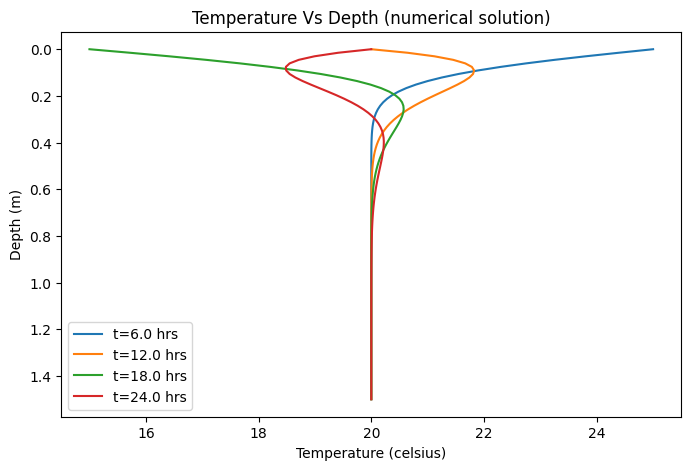

In [7]:
plt.figure(figsize=(8, 5))
for i in range(4):
    complot=soln[i*5000+5000]
    plt.plot(complot,z,label=f't={(tf/20000*(i*5000+5000))*24/30} hrs')

# for i in range(len(plotanlyt)):
#     plt.scatter(z,plotanlyt[i],label=f't={i}')

plt.xlabel('Temperature (celsius)')
plt.ylabel('Depth (m)')
plt.legend()
plt.title('Temperature Vs Depth (numerical solution)')
plt.gca().invert_yaxis()
plt.legend()
plt.savefig("coupled_numer.png", dpi=300)
plt.show()  




In [8]:

To=24*3600


# C_w=4174000
# C_s=2104000
# C_s=1739
# C_w=4180



a1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5-(qf*C_w*rho_w/(2*lamb))
b1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5

def Tfnn(x,t):
    return (A*np.exp(-a1*x)*np.sin(-b1*x+(2*np.pi*t/To)))+20



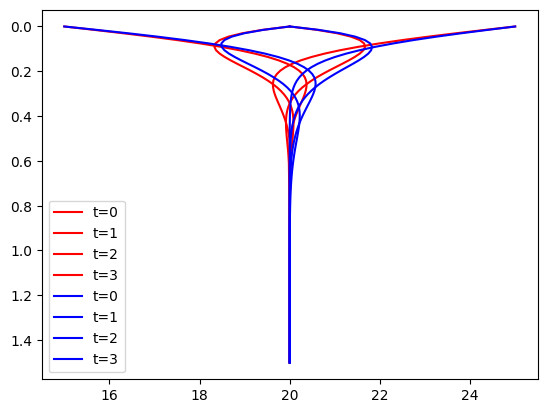

In [9]:
zz=np.linspace(0,1.5,100)

complot=[soln[5000],soln[10000],soln[15000],soln[20000]]

plotanlyt=[Tfnn(zz,(6*3600)),Tfn(zz,(12*3600)),Tfn(zz,(18*3600)),Tfn(zz,(24*3600))]

#plt.figure(8,10)

for i in range(len(plotanlyt)):
    plt.plot(plotanlyt[i],zz,color='Red',label=f't={i}')

for j in range(len(complot)):
    #print(complot[j])
    plt.plot(complot[j],z,color="Blue",label=f't={j}')

# for i in range(len(plotanlyt)):
#     plt.scatter(z,plotanlyt[i],label=f't={i}')
plt.gca().invert_yaxis()
plt.legend()
plt.show() 

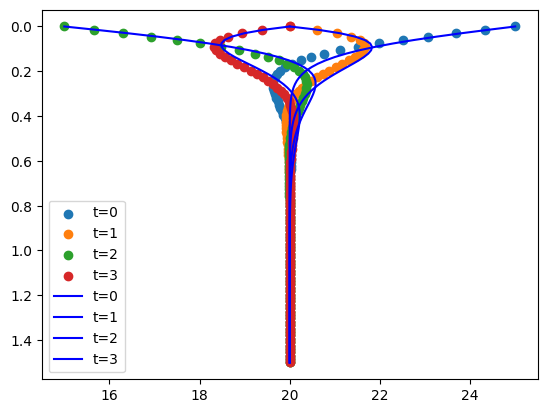

In [10]:
zz=np.linspace(0,1.5,100)

complot=[soln[5000],soln[10000],soln[15000],soln[20000]]

plotanlyt=[Tfnn(zz,(6*3600)),Tfn(zz,(12*3600)),Tfn(zz,(18*3600)),Tfn(zz,(24*3600))]

#plt.figure(8,10)

for i in range(len(plotanlyt)):
    plt.scatter(plotanlyt[i],zz,label=f't={i}')

for j in range(len(complot)):
    #print(complot[j])
    plt.plot(complot[j],z,color="Blue",label=f't={j}')

# for i in range(len(plotanlyt)):
#     plt.scatter(z,plotanlyt[i],label=f't={i}')
plt.gca().invert_yaxis()
plt.legend()
plt.show() 

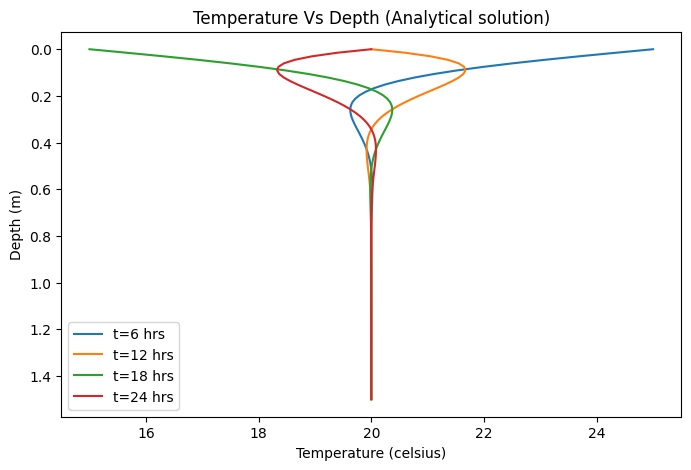

In [11]:
plt.figure(figsize=(8, 5))
for i in range(4):
    plotanlyt=Tfnn(zz,((6+(6*i))*3600))
    plt.plot(plotanlyt,zz,label=f't={(6+(6*i))} hrs')

plt.xlabel('Temperature (celsius)')
plt.ylabel('Depth (m)')
plt.legend()
plt.title('Temperature Vs Depth (Analytical solution)')
plt.gca().invert_yaxis()
plt.legend()
plt.savefig("coupled_analyt.png", dpi=300)
plt.show() 